In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic multivariate data
np.random.seed(42)
data = pd.DataFrame(
    {
        "Age": np.random.randint(18, 60, 100),
        "Income": np.random.normal(50000, 15000, 100),
        "SpendingScore": np.random.uniform(1, 100, 100),
    }
)

In [4]:
data.shape

(100, 3)

In [5]:
data.head()

,Age,Income,SpendingScore
0,56,47476.923679,88.380998
1,46,67471.529683,19.682004
2,32,46313.784689,28.608264
3,25,38454.983395,70.335425
4,38,68182.585132,84.819453


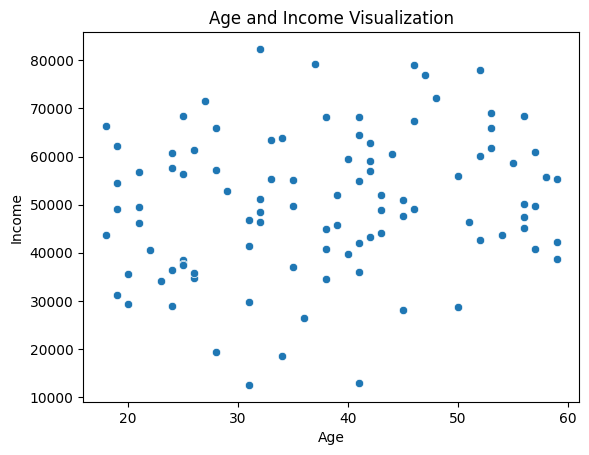

In [6]:
# Visualize age and income
sns.scatterplot(x="Age", y="Income", data=data)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age and Income Visualization")
plt.show()

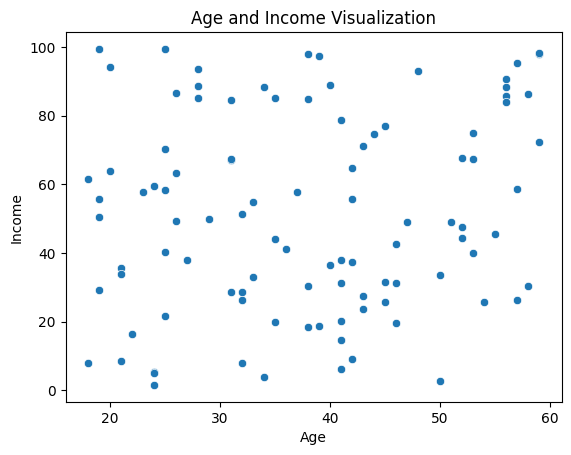

In [7]:
# Visualize age and SpendingScore
sns.scatterplot(x="Age", y="SpendingScore", data=data)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age and Income Visualization")
plt.show()

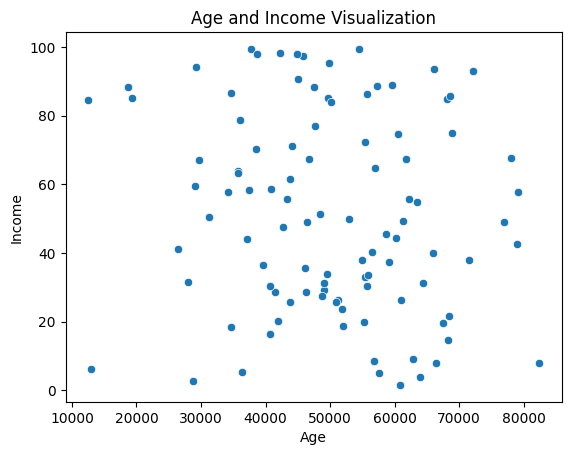

In [8]:
# Visualize income and SpendingScore
sns.scatterplot(x="Income", y="SpendingScore", data=data)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age and Income Visualization")
plt.show()

### 1. Measures of Central Tendency: Multivariate Mean


In [9]:
mean_vector = data.mean(axis=0)
print("Multivariate Mean:\n", mean_vector)

Multivariate Mean:
 Age                 37.910000
Income           50125.408702
SpendingScore       51.274234
dtype: float64


### 2. Measures of Dispersion: Variance and Covariance Matrix

In [10]:
# Covariance matrix
cov_matrix = data.cov()
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
                         Age        Income  SpendingScore
Age              149.315051  3.447753e+04      54.798295
Income         34477.525657  2.156343e+08  -59833.819498
SpendingScore     54.798295 -5.983382e+04     828.556140


In [11]:
# Correlation matrix and visualization
corr_matrix = data.corr()
print("\nCorrelation Matrix:\n", corr_matrix)



Correlation Matrix:
                     Age    Income  SpendingScore
Age            1.000000  0.192143       0.155795
Income         0.192143  1.000000      -0.141556
SpendingScore  0.155795 -0.141556       1.000000


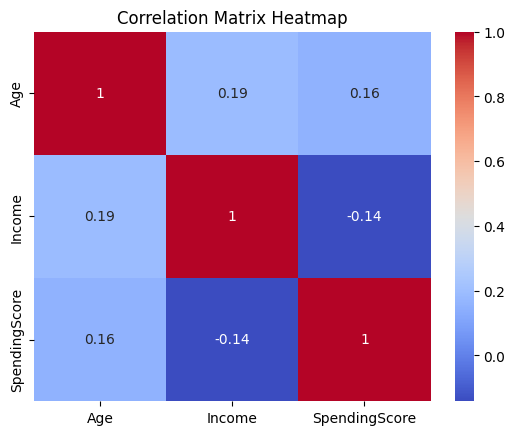

In [12]:
# Heatmap for correlation
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
# Calculate covariance matrix
cov_matrix = np.cov(data, rowvar=False)  # rowvar=False: columns are variables
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.49315051e+02  3.44775257e+04  5.47982953e+01]
 [ 3.44775257e+04  2.15634264e+08 -5.98338195e+04]
 [ 5.47982953e+01 -5.98338195e+04  8.28556140e+02]]


### 3. Correlation Matrix

In [14]:
# Calculate correlation matrix
corr_matrix = np.corrcoef(data, rowvar=False)
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
[[ 1.          0.19214337  0.15579528]
 [ 0.19214337  1.         -0.14155554]
 [ 0.15579528 -0.14155554  1.        ]]


#### 4. Outlier Detection with Mahalanobis Distance

Mahalanobis distance measures the distance of a point 
$x_i$ from the mean $\mu$ , accounting for the covariance structure of the data:

$$D_M^2(\mathbf{x}_i) = (\mathbf{x}_i - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x}_i - \boldsymbol{\mu})$$

Where:
- $\Sigma^{-1}$: Inverse of the covariance matrix.
- Larger $D_M^2$ values indicate potential outliers.

In [15]:
from scipy.spatial.distance import mahalanobis

# Calculate Mahalanobis distance for all points
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = [
    mahalanobis(row, mean_vector, inv_cov_matrix) for row in data.values
]

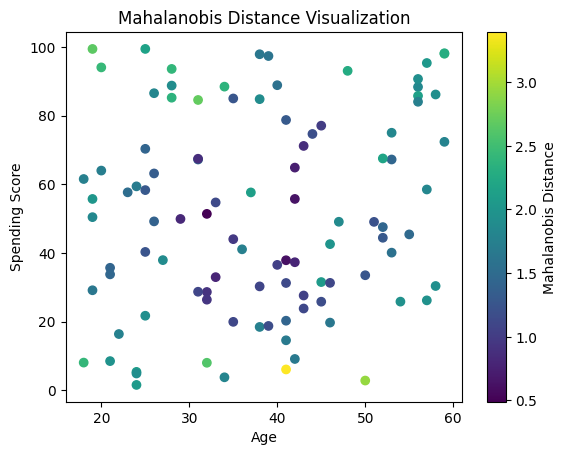

In [16]:
# Visualize Mahalanobis distances
plt.scatter(data["Age"], data["SpendingScore"], c=mahalanobis_distances, cmap="viridis")
plt.colorbar(label="Mahalanobis Distance")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Mahalanobis Distance Visualization")
plt.show()

In [17]:
# Identify potential outliers (threshold: 3 standard deviations)
threshold = 3
outliers = np.where(np.array(mahalanobis_distances) > threshold)[0]

print("Mahalanobis Distances:")
print(mahalanobis_distances)
print("\nOutlier Indices:")
print(outliers)

Mahalanobis Distances:
[1.8501895999889821, 1.6363324906779217, 0.919160958125742, 1.4249362762704492, 1.8947190571028867, 2.130250788251249, 1.7424172000005589, 1.567330248714853, 2.355100173384217, 2.398400756455211, 1.302618964836685, 1.438664754379375, 1.8381675632526506, 0.6051925763319211, 2.4315138175905213, 1.610769638945971, 1.6434967309680066, 1.1387732828180948, 1.8710569601034341, 1.4836900554437005, 2.6605262024610257, 1.7442938625030677, 2.933724110815094, 0.8113120601115997, 1.1666051066967402, 0.7934997025154604, 1.1821225793602312, 1.792369249621875, 2.0635143072424205, 1.1376201962822168, 0.4902788290000802, 1.7249905654052458, 1.943259731741706, 1.7029432581840047, 1.6409885549693857, 1.3940839641322695, 1.9280787153754615, 0.9673529570551446, 1.424420732266176, 0.7290101586693227, 1.48264124255288, 1.8184497020241774, 1.1223902463050597, 1.8462655175060472, 2.119738972901986, 1.0112143309321855, 2.0880323577632334, 2.1653582166668484, 1.4411571127156821, 1.099656675

## Data processing

1. Standardization (Z-score normalization)

Mathematically:

Standardization ensures that each variable has a mean of 0 and a standard deviation of 1:

$$z_{ij} = \frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

Where:
- $x_{ij}$ : Value of the $j$-th variable for the $i$-th observation.
- $\mu_j$ is the mean of $j$-th variable in the data.
- $\sigma_j$ is the standard deviation of $j$-th variable in the data.
- $z_{ij}$ standard deviation of $j$-th variable.

This is important for multivariate methods like PCA, clustering, and regression.which can be sensitive to the scale of the variables.

In [19]:
standardized_data = (data - mean_vector) / np.std(data, axis=0)

print("Standardized Data:")
print(standardized_data[:5])

Standardized Data:
        Age    Income  SpendingScore
0  1.487884 -0.181268       1.295611
1  0.665394  1.187205      -1.103067
2 -0.486092 -0.260876      -0.791399
3 -1.061835 -0.798749       0.665536
4  0.007402  1.235872       1.171257


2. Centering the Data

Mathematically:

Centering the data ensures that each variable has a mean of 0:

$$x_{ij}' = x_{ij} - \mu$$

Where:
- $x_{ij}$ is the original value.
- $\mu$ is the mean of the data.
- $x_{ij}'$ is the centered value.


In [20]:
centered_data = data - mean_vector

print("Centered Data:")
print(centered_data[:5])

Centered Data:
     Age        Income  SpendingScore
0  18.09  -2648.485023      37.106764
1   8.09  17346.120981     -31.592230
2  -5.91  -3811.624013     -22.665970
3 -12.91 -11670.425307      19.061192
4   0.09  18057.176430      33.545220


3. Handling Missing Data

Techniques:

- Mean/Median Imputation: Replace missing values with the variable’s mean or median.
- K-Nearest Neighbors (KNN) Imputation: Replace missing values based on similar observations.
- Dropping Missing Values: Remove rows or columns with missing data (if small proportion).

In [24]:
# Mean median imputation of data
data_with_nan = data.copy()
data_with_nan[5, 0] = np.nan

mean_imputed_data = np.where(
    np.isnan(data_with_nan), np.nanmean(data_with_nan, axis=0), data_with_nan
)

print("Mean Imputed Data:")
print(mean_imputed_data[:5])

Mean Imputed Data:
[[5.60000000e+01 4.74769237e+04 8.83809980e+01            nan]
 [4.60000000e+01 6.74715297e+04 1.96820037e+01            nan]
 [3.20000000e+01 4.63137847e+04 2.86082639e+01            nan]
 [2.50000000e+01 3.84549834e+04 7.03354252e+01            nan]
 [3.80000000e+01 6.81825851e+04 8.48194531e+01            nan]]


C:\Users\aviji\AppData\Local\Temp\ipykernel_1876\3274800119.py:6: RuntimeWarning: Mean of empty slice
  np.isnan(data_with_nan), np.nanmean(data_with_nan, axis=0), data_with_nan


4. outlier handling

- Univariate Outliers: Use thresholds like z>3 for individual variables.
- Multivariate Outliers: Use Mahalanobis Distance (as explained earlier).

In [25]:
z_scores = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
outliers = np.where(np.abs(z_scores) > 3)[0]

print("Z-Scores:")
print(z_scores[:5])

Z-Scores:
        Age    Income  SpendingScore
0  1.487884 -0.181268       1.295611
1  0.665394  1.187205      -1.103067
2 -0.486092 -0.260876      -0.791399
3 -1.061835 -0.798749       0.665536
4  0.007402  1.235872       1.171257
